In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv("cleaned_preprocessed_dataset.csv")
df.head()


,activitysiteid,activitydescription,bookingenddatetime_(month_/_day_/_year)_apr_may,bookingstarttime_apr_may,maxbookees_apr_may,number_booked_apr_may,price_(inr)_apr_may,bookingenddatetime_(month_/_day_/_year)_june,bookingstarttime_june,maxbookees_june,number_booked_june,price_(inr)_june
0,BRP,20:20:20 10-11 Am,2018-04-03,10:00:00,0.239673,1.528272,-1.731935,2018-06-05,10:00:00,35.0,25.0,499.0
1,BRP,20:20:20 10-11 Am,2018-04-03,10:00:00,0.239673,1.528272,-1.731935,2018-06-12,10:00:00,35.0,23.0,499.0
2,BRP,20:20:20 10-11 Am,2018-04-03,10:00:00,0.239673,1.528272,-1.731935,2018-06-19,10:00:00,35.0,21.0,499.0
3,BRP,20:20:20 10-11 Am,2018-04-03,10:00:00,0.239673,1.528272,-1.731935,2018-06-26,10:00:00,35.0,18.0,499.0
4,BRP,20:20:20 10-11 Am,2018-04-10,10:00:00,0.239673,0.891390,-1.731935,2018-06-05,10:00:00,35.0,25.0,499.0


In [2]:
# Convert date columns
df["bookingenddatetime_(month_/_day_/_year)_apr_may"] = pd.to_datetime(
    df["bookingenddatetime_(month_/_day_/_year)_apr_may"], errors="coerce"
)

df["bookingenddatetime_(month_/_day_/_year)_june"] = pd.to_datetime(
    df["bookingenddatetime_(month_/_day_/_year)_june"], errors="coerce"
)

# Unified booking date
df["booking_date"] = df[
    "bookingenddatetime_(month_/_day_/_year)_apr_may"
].combine_first(
    df["bookingenddatetime_(month_/_day_/_year)_june"]
)

# Unified numeric columns
df["price"] = df["price_(inr)_apr_may"].combine_first(df["price_(inr)_june"])
df["number_booked"] = df["number_booked_apr_may"].combine_first(df["number_booked_june"])
df["maxbookees"] = df["maxbookees_apr_may"].combine_first(df["maxbookees_june"])

# Attendance metric
df["attendance_ratio"] = df["number_booked"] / df["maxbookees"]

df[["booking_date", "price", "number_booked", "maxbookees", "attendance_ratio"]].head()


,booking_date,price,number_booked,maxbookees,attendance_ratio
0,2018-04-03,-1.731935,1.528272,0.239673,6.376480
1,2018-04-03,-1.731935,1.528272,0.239673,6.376480
2,2018-04-03,-1.731935,1.528272,0.239673,6.376480
3,2018-04-03,-1.731935,1.528272,0.239673,6.376480
4,2018-04-10,-1.731935,0.891390,0.239673,3.719189


In [3]:
df.info()
df.describe()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9793 entries, 0 to 9792
Data columns (total 17 columns):
 #   Column                                           Non-Null Count  Dtype         
---  ------                                           --------------  -----         
 0   activitysiteid                                   9793 non-null   object        
 1   activitydescription                              9793 non-null   object        
 2   bookingenddatetime_(month_/_day_/_year)_apr_may  9741 non-null   datetime64[ns]
 3   bookingstarttime_apr_may                         9741 non-null   object        
 4   maxbookees_apr_may                               9741 non-null   float64       
 5   number_booked_apr_may                            9741 non-null   float64       
 6   price_(inr)_apr_may                              9741 non-null   float64       
 7   bookingenddatetime_(month_/_day_/_year)_june     9695 non-null   datetime64[ns]
 8   bookingstarttime_june                 

,bookingenddatetime_(month_/_day_/_year)_apr_may,maxbookees_apr_may,number_booked_apr_may,price_(inr)_apr_may,bookingenddatetime_(month_/_day_/_year)_june,maxbookees_june,number_booked_june,price_(inr)_june,booking_date,price,number_booked,maxbookees,attendance_ratio
count,9741,9.741000e+03,9.741000e+03,9.741000e+03,9695,9695.000000,9695.000000,9695.000000,9793,9793.000000,9793.000000,9793.000000,9793.000000
mean,2018-04-30 17:23:49.134585600,-1.050387e-16,-1.750644e-16,1.342161e-16,2018-06-15 16:57:43.723568640,31.616606,16.268179,1864.838061,2018-04-30 23:13:32.049423104,9.317676,0.065863,0.159604,0.871083
min,2018-04-01 00:00:00,-2.021529e+00,-1.762283e+00,-1.731935e+00,2018-06-01 00:00:00,2.000000,1.000000,499.000000,2018-04-01 00:00:00,-1.731935,-1.762283,-2.021529,-7.056282
25%,2018-04-16 00:00:00,-5.140608e-01,-8.069607e-01,-7.252275e-01,2018-06-08 00:00:00,24.000000,9.000000,1299.000000,2018-04-16 00:00:00,-0.725228,-0.700814,-0.514061,-0.571237
50%,2018-05-01 00:00:00,-1.714544e-01,-6.393224e-02,1.556412e-01,2018-06-15 00:00:00,30.000000,16.000000,1999.000000,2018-05-01 00:00:00,0.155641,-0.063932,-0.102933,0.619777
75%,2018-05-16 00:00:00,2.396732e-01,6.790962e-01,7.848332e-01,2018-06-22 00:00:00,35.000000,23.000000,2499.000000,2018-05-16 00:00:00,0.784833,0.679096,0.239673,1.776264
max,2018-05-31 00:00:00,2.637918e+00,4.924973e+00,2.672409e+00,2018-06-30 00:00:00,70.000000,52.000000,3999.000000,2018-06-30 00:00:00,3999.000000,32.000000,70.000000,17.120654
std,NaN,1.000051e+00,1.000051e+00,1.000051e+00,NaN,14.496544,8.963781,767.518432,NaN,139.833502,1.491380,2.577368,2.704781


In [4]:
df.isna().sum()


activitysiteid                                      0
activitydescription                                 0
bookingenddatetime_(month_/_day_/_year)_apr_may    52
bookingstarttime_apr_may                           52
maxbookees_apr_may                                 52
number_booked_apr_may                              52
price_(inr)_apr_may                                52
bookingenddatetime_(month_/_day_/_year)_june       98
bookingstarttime_june                              98
maxbookees_june                                    98
number_booked_june                                 98
price_(inr)_june                                   98
booking_date                                        0
price                                               0
number_booked                                       0
maxbookees                                          0
attendance_ratio                                    0
dtype: int64

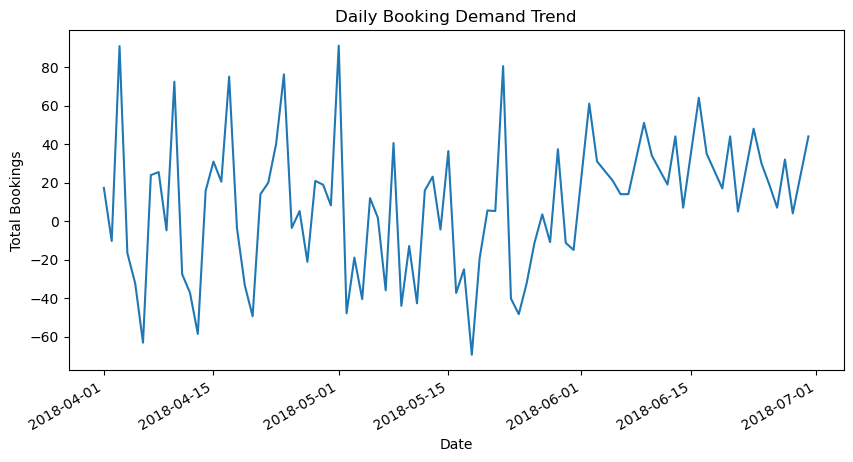

In [5]:
daily_demand = df.groupby("booking_date")["number_booked"].sum()

plt.figure(figsize=(10,5))
daily_demand.plot()
plt.title("Daily Booking Demand Trend")
plt.xlabel("Date")
plt.ylabel("Total Bookings")
plt.show()


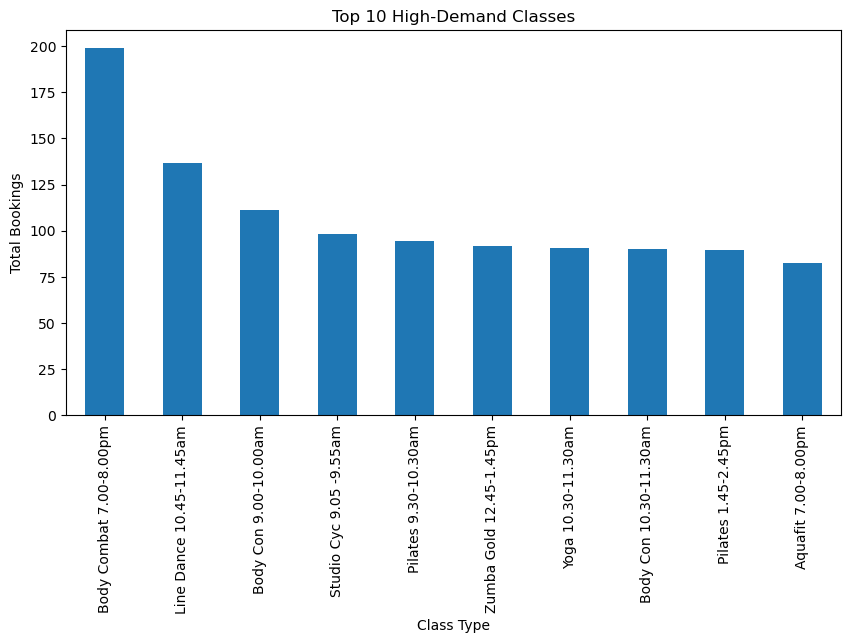

In [6]:
top_classes = (
    df.groupby("activitydescription")["number_booked"]
    .sum()
    .sort_values(ascending=False)
    .head(10)
)

plt.figure(figsize=(10,5))
top_classes.plot(kind="bar")
plt.title("Top 10 High-Demand Classes")
plt.xlabel("Class Type")
plt.ylabel("Total Bookings")
plt.show()


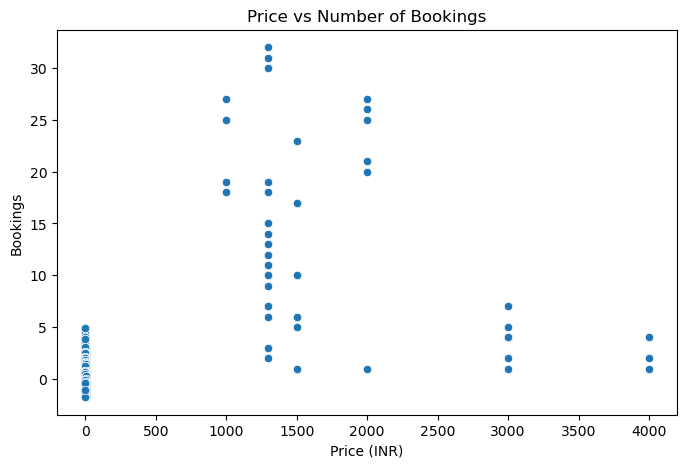

In [7]:
plt.figure(figsize=(8,5))
sns.scatterplot(data=df, x="price", y="number_booked")
plt.title("Price vs Number of Bookings")
plt.xlabel("Price (INR)")
plt.ylabel("Bookings")
plt.show()


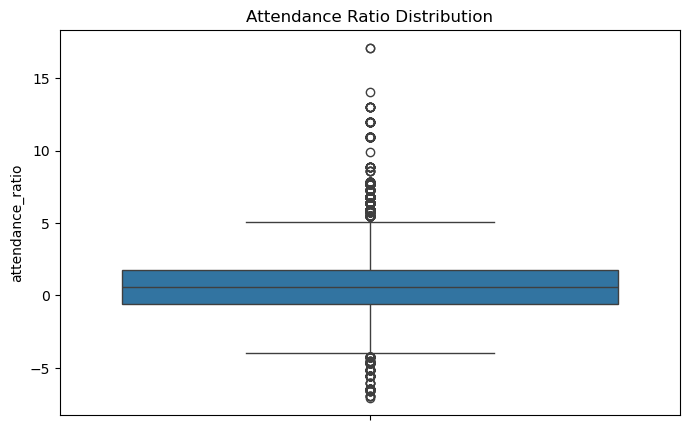

In [8]:
plt.figure(figsize=(8,5))
sns.boxplot(y=df["attendance_ratio"])
plt.title("Attendance Ratio Distribution")
plt.show()
